<a href="https://colab.research.google.com/github/arpit4101/Machine-Learning-Concepts/blob/main/Feature%20Selection/Feature_Selection_3_Embedded_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection using Lasso

In [ ]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
columns = X.columns

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

cols = X.columns

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222
...,...,...,...,...,...,...,...,...
609,-0.551400,1.129853,0.260536,0.957869,3.098656,0.992566,-1.008254,-0.279481
610,0.925736,2.078175,-0.956345,0.831660,2.686605,0.271185,1.107339,0.059484
611,2.698300,0.149919,1.071790,-1.250779,-0.678474,1.517206,0.364436,0.737415
612,0.039454,1.572403,0.159129,-1.250779,-0.678474,1.543438,0.046486,-0.618446


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)

lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
lasso.coef_

array([ 6.26290474e-02,  1.85968700e-01, -3.50258983e-02, -0.00000000e+00,
       -1.62558777e-04,  8.51781764e-02,  2.83810683e-02,  1.84611338e-02])

<Axes: >

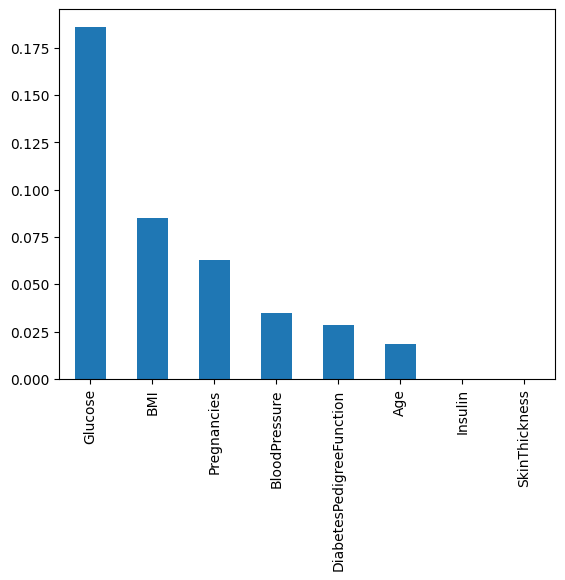

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_), index=cols)

x.sort_values(ascending=False).plot(kind='bar')

# Feature Selection using descision tree

In [ ]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

cols = X.columns

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.feature_importances_

array([0.06432655, 0.29551244, 0.09466119, 0.0522311 , 0.02816187,
       0.18469111, 0.1356395 , 0.14477623])

<Axes: >

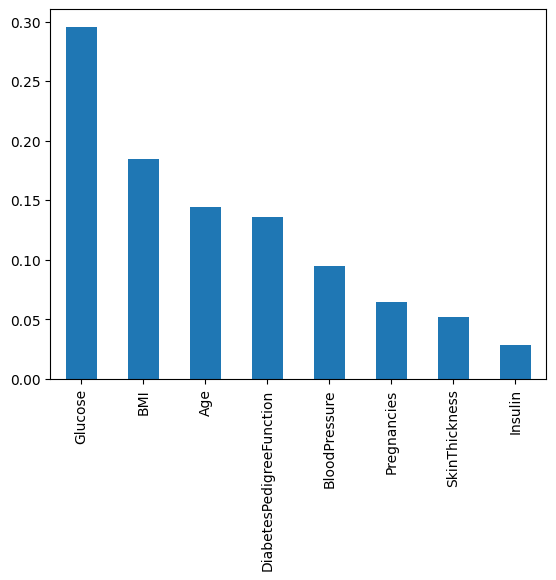

In [ ]:
x = pd.Series(np.abs(dt.feature_importances_), index=cols)
x.sort_values(ascending=False).plot(kind='bar')

# Feature Selection using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.feature_importances_

array([0.07998825, 0.24429421, 0.09170391, 0.07162582, 0.08129388,
       0.16424568, 0.13186237, 0.13498589])

<Axes: >

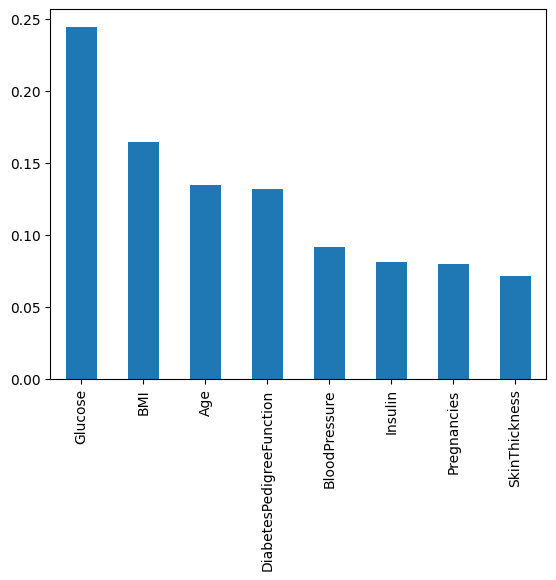

In [ ]:
x = pd.Series(np.abs(rf.feature_importances_), index=cols)
x.sort_values(ascending=False).plot(kind='bar')

# SelectFromModel (Embedded method)

In [ ]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

cols = X.columns

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold=0.1)

sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.1)

In [ ]:
sfm.get_support(indices=True)

array([1, 2, 5, 6, 7])

In [ ]:
sfm.get_support(indices=True)
columns[sfm.get_support(indices=True)]

Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [ ]:
sfm.get_feature_names_out()
# col1 = np.array(col1)
# colu = []
# for i in col1 :
#   colu.append(i)


array(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction',
       'Age'], dtype=object)

In [ ]:
X_train = sfm.transform(X_train)
X_test= sfm.transform(X_test)


In [ ]:
X_train = pd.DataFrame(X_train, columns = sfm.get_feature_names_out())
X_train

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.750524,0.564756,0.795825,0.529526,0.567932
1,0.244752,-0.347904,1.228654,-0.069689,0.398450
2,-0.608739,0.260536,0.704013,-0.794249,0.991638
3,-0.039745,0.463350,-0.896139,-0.167519,2.601722
4,-0.039745,0.361943,1.031914,-0.760619,-0.364222
...,...,...,...,...,...
609,1.129853,0.260536,0.992566,-1.008254,-0.279481
610,2.078175,-0.956345,0.271185,1.107339,0.059484
611,0.149919,1.071790,1.517206,0.364436,0.737415
612,1.572403,0.159129,1.543438,0.046486,-0.618446


# Recursive Feature Elimination (RFE)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns = X.columns

X = sc.fit_transform(X)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
X = pd.DataFrame(X, columns = columns)
X

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rfe = RFE(rf, n_features_to_select=1)

model = rfe.fit(X,y)

In [ ]:
model.get_feature_names_out()

array(['petal_length'], dtype=object)

In [ ]:
ranking = rfe.ranking_
print('feature ranking : ')
for i in ranking :
  print(f'{columns[i-1]} : {i}')

feature ranking : 
petal_length : 3
petal_width : 4
sepal_length : 1
sepal_width : 2


In [ ]:
X = rfe.transform(X)

In [ ]:
X = pd.DataFrame(X, columns = rfe.get_feature_names_out())
X

,petal_length
0,-1.341272
1,-1.341272
2,-1.398138
3,-1.284407
4,-1.341272
...,...
145,0.819624
146,0.705893
147,0.819624
148,0.933356
